In [2]:
# 농어의 무게를 예측하라?

In [3]:
# 앞서 보았던 k-최근접 이웃 분류는
# x값의 주변에 ㅁ이 2개이고 ㅇ가 1개라면 x를 ㅁ으로 분류했다

In [4]:
# 이제 알아볼 k-최근접 이웃 회귀는
# x값의 주변에 100, 80, 60의 값이 있다면 (100 + 80 + 60 / 3) 과 같이
# 주변값의 평균값으로 x의 값을 예측하는 방식이다

In [6]:
# 농어의 길이와 무게 데이터

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 
                         21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5,
                         24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7,
                         30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0,
                         40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0,
                         125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0,
                         170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0,
                         250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0,
                         650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])


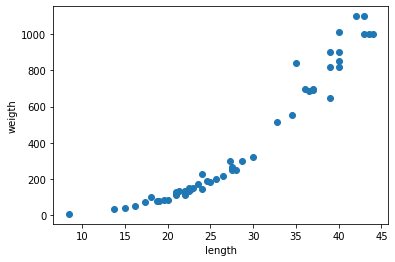

In [7]:
# 농어의 길이만 사용하여 농어의 무게를 예측

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [10]:
# 훈련세트 준비

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                       perch_weight,
                                                                       random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# reshape : shape을 재설정하는 함수
# -1은 다른 차원의 갯수가 정해지고나면 나머지 값을 모두 갖겠다는 의미

In [11]:
# 회귀 모델 훈련

from sklearn.neighbors import KNeighborsRegressor
# 분류 모델은 Classifier, 회귀모델은 Regressor 을 사용함
# 회귀모델 인스턴스 생성
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
knr.score(test_input, test_target)

# R^2 = 1 - (sum((test_타깃 - 예측)^2) / sum((test_타깃 - test_타깃의 평균)^2))
# 이렇게 결졍계수(R^2)값을 구하게 되는데
# 예측을 많이 맞출수록 1에 가까운 값을 반환하게 된다 (분자가 0에 가까울 수록)

0.992809406101064

In [ ]:
# 반환값을 보면 예측을 많이 맞추었다고 볼 수 있음

In [14]:
# R^2 말고도 다른 지표를 사용해서 모델의 성능을 파악할 수 있다
# 평균 절대값 오차, 평균 제곱근 오차를 활용할 수도 있음

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
# test_input으로 예측한 값

mae = mean_absolute_error(test_target, test_prediction)
# test_target, test_prediction의 차이값의 평균
# 절대값으로 나오기 때문에 음수가 아닌 양수로 출력 됨

print(mae)

19.157142857142862


In [16]:
# 과대적합과 과소적합

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


In [17]:
# 위의 값을 보면 훈련점수보다 테스트점수가 더 높게 나왔다
# 대체로 테스트점수가 훈련점수보다 낮게 나오기 마련이다

# 이러한 현상을 훈련세트를 적절히 학습하지 못했다고 판단하여 과소적합되었다고 함
# 과소적합의 문제점은 모델이 우연히 예측값을 잘 맞췄다고 볼 수 있다는 관점으로
# 제대로 된 학습으로 보기 어렵다는 점

# 반대로 훈련세트의 훈련점수가 더 높게는 나왔으나 테스트점수와 차이가 크다면 과대적합되었다고 함
# 과대적합의 문제는 대부분 특성의 수가 다양하지 못하거나 샘플링편향 등을 의심해볼 수 있다
# 모델이 편향적인 학습으로 일어난 현상이라고 볼 수 있다

In [18]:
# 이웃 개수 줄이기
# 이웃의 개수에 따라 예측값이 달라지게 되어있다
# 이웃의 개수가 적을수록 과대적합 될 가능성이 커지고, 이웃의 개수가 늘어날 수록 과소적합 됨

# 기본값이 5인 n_neighbors의 값을 3으로 줄여서 다시 실행
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [ ]:
# 훈련점수와 테스트점수를 살펴보니 훈련점수가 테스트 점수보다 높아 과소적합되지도 않았고
# 두 값의 차이를 보아도 차이가 크지 않은 것을 보면 과대적합되지도 않았음을 알 수 있다
# 이 정도면 적절한 접점을 찾았다고 할 수 있음